In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
df = pd.read_excel('data/monthly_avg.xlsx', parse_dates=['Date'], index_col='Date')
df.index = df.index.strftime('%m.%Y')
df = df.round(4)
df

,CHF,EUR,GPB,USD,AUD,UAH,NOK
Date,,,,,,,
06.2023,4.5448,4.4437,5.1751,4.0777,2.7129,0.1106,0.3779
07.2023,4.5988,4.4429,5.1749,4.0190,2.7063,0.1090,0.3913
08.2023,4.6529,4.4598,5.1946,4.0880,2.6514,0.1108,0.3908
09.2023,4.7908,4.5977,5.3353,4.3033,2.7645,0.1166,0.4013
10.2023,4.7249,4.5133,5.1986,4.2708,2.7136,0.1169,0.3886
11.2023,4.5668,4.3997,5.0545,4.0690,2.6442,0.1125,0.3729
12.2023,4.5883,4.3321,5.0269,3.9733,2.6552,0.1070,0.3758
01.2024,4.6625,4.3651,5.0839,4.0020,2.6600,0.1057,0.3849
02.2024,4.5747,4.3275,5.0646,4.0103,2.6177,0.1055,0.3800


In [45]:
print(df.describe())

             CHF        EUR        GPB        USD        AUD        UAH  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    4.570792   4.392031   5.113646   4.058362   2.663200   0.107492   
std     0.122745   0.094714   0.096437   0.109578   0.048527   0.005908   
min     4.353300   4.280000   5.000600   3.958500   2.597500   0.099200   
25%     4.492800   4.324500   5.036100   4.002000   2.623500   0.102300   
50%     4.574700   4.365100   5.083900   4.012200   2.655200   0.107000   
75%     4.652900   4.443700   5.175100   4.077700   2.706300   0.110800   
max     4.790800   4.597700   5.335300   4.303300   2.764500   0.116900   

             NOK  
count  13.000000  
mean    0.380954  
std     0.009841  
min     0.368300  
25%     0.373700  
50%     0.378100  
75%     0.388600  
max     0.401300  


In [46]:
#LOOKING_FOR_THE_HIGHEST_AND_SMALLEST_VALUE_FOR_SPECIFIC_CURRENCIES:

In [47]:
def get_max_min(df, column):
    max_date = df[column].idxmax()
    max_value = df.loc[max_date, column]
    min_date = df[column].idxmin()
    min_value = df.loc[min_date, column]
    return {'currency': column, 'max_date': max_date, 'max_value': max_value, 'min_date': min_date, 'min_value': min_value}

In [48]:
results = []
for col in df.columns:
    results.append(get_max_min(df, col))

In [49]:
df_high_low = pd.DataFrame(results)
df_high_low.set_index('currency', inplace=True)
df_high_low

,max_date,max_value,min_date,min_value
currency,,,,
CHF,09.2023,4.7908,05.2024,4.3533
EUR,09.2023,4.5977,05.2024,4.2800
GPB,09.2023,5.3353,05.2024,5.0006
USD,09.2023,4.3033,05.2024,3.9585
AUD,09.2023,2.7645,03.2024,2.5975
UAH,10.2023,0.1169,06.2024,0.0992
NOK,09.2023,0.4013,04.2024,0.3683


In [50]:
df_high_low.to_excel('data/high_low.xlsx')

In [51]:
#CALCULATING_PERCENTAGE_CHANGES:

In [52]:
df_pct_change = df.pct_change().dropna()*100
df_pct_change = df_pct_change.round(2)
df_pct_change

,CHF,EUR,GPB,USD,AUD,UAH,NOK
Date,,,,,,,
07.2023,1.19,-0.02,-0.00,-1.44,-0.24,-1.45,3.55
08.2023,1.18,0.38,0.38,1.72,-2.03,1.65,-0.13
09.2023,2.96,3.09,2.71,5.27,4.27,5.23,2.69
10.2023,-1.38,-1.84,-2.56,-0.76,-1.84,0.26,-3.16
11.2023,-3.35,-2.52,-2.77,-4.73,-2.56,-3.76,-4.04
12.2023,0.47,-1.54,-0.55,-2.35,0.42,-4.89,0.78
01.2024,1.62,0.76,1.13,0.72,0.18,-1.21,2.42
02.2024,-1.88,-0.86,-0.38,0.21,-1.59,-0.19,-1.27
03.2024,-2.49,-0.46,-0.56,-1.16,-0.77,-3.03,-1.66


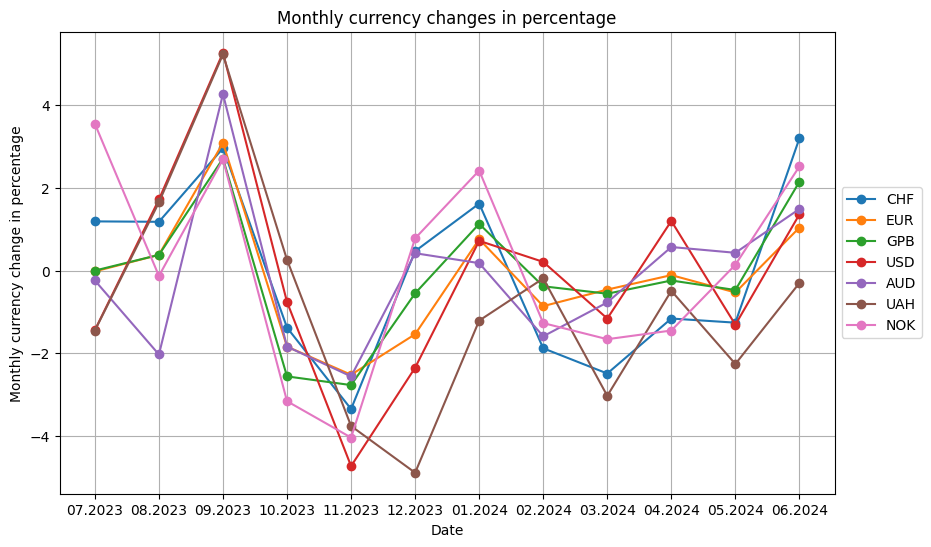

In [53]:
plt.figure(figsize=(10, 6))

plt.plot(df_pct_change.index, df_pct_change['CHF'], label='CHF', marker='o')
plt.plot(df_pct_change.index, df_pct_change['EUR'], label='EUR', marker='o')
plt.plot(df_pct_change.index, df_pct_change['GPB'], label='GPB', marker='o')
plt.plot(df_pct_change.index, df_pct_change['USD'], label='USD', marker='o')
plt.plot(df_pct_change.index, df_pct_change['AUD'], label='AUD', marker='o')
plt.plot(df_pct_change.index, df_pct_change['UAH'], label='UAH', marker='o')
plt.plot(df_pct_change.index, df_pct_change['NOK'], label='NOK', marker='o')

plt.title('Monthly currency changes in percentage')
plt.xlabel('Date')
plt.ylabel('Monthly currency change in percentage')

step = 0,2
yticks_values = np.arange(-5.0, 5.0, 0.1)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.savefig('data/currency_changes_in_percentage.pdf')
plt.show()

In [54]:
df_pct_change.to_excel('data/')

In [55]:
#CORRELATION_MATRIX:

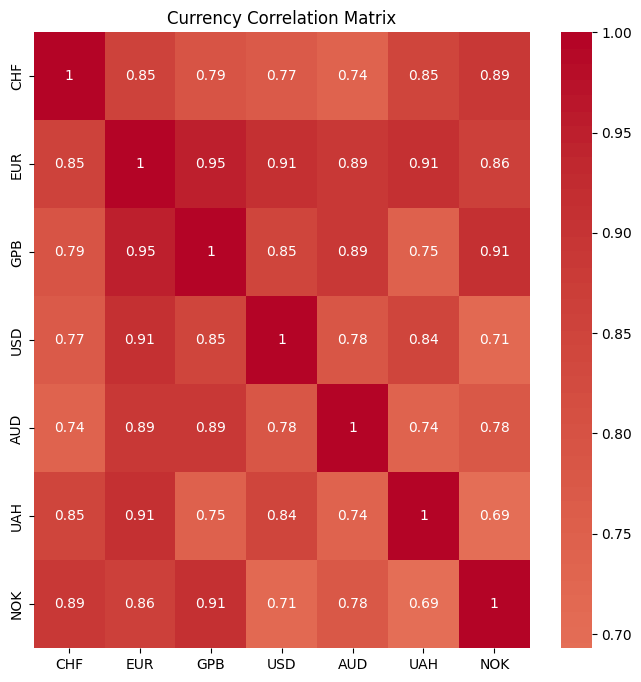

In [56]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Currency Correlation Matrix')
plt.savefig('data/currency_corelation_matrix.pdf')
plt.show()